# Digital Image Processing — Student Assignment Notebook

**Spring 2026**  
**Topic:** Image I/O, grayscale/binary, cropping (ROI), color spaces, and basic arithmetic operations

Fill in the fields below and complete **all TODO cells**.

**Student name:** Fotima Rahimova  
**Student ID:** 230108
**Date:** 2026-02-06


## 0) Environment check

Run the next cell. If you see import errors, install the missing packages (e.g., `pip install opencv-python matplotlib scikit-image`).

In [7]:
# Imports (run once)
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data  # provides sample images (offline)

print("OpenCV:", cv2.__version__)


OpenCV: 4.13.0


## Helper functions (provided)

Use these helpers for consistent display and safe arithmetic on `uint8` images.

In [21]:
def to_rgb(img_bgr_or_rgb):
    """Ensure image is RGB uint8."""
    if img_bgr_or_rgb is None:
        raise ValueError('/Users/admin/Downloads/cat.jpeg')
    img = img_bgr_or_rgb
    if img.ndim == 2:
        return img
    return img

def load_image(path=None):
    """Load an RGB image. If path is missing, fall back to a built-in sample."""
    if path and os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise ValueError(f"Failed to read: {path}")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb
    return data.astronaut()

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img1, cmap=cmap1); plt.title(title1); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img2, cmap=cmap2); plt.title(title2); plt.axis('off')
    plt.axis('off')
    plt.show()

def clip_uint8(x):
    """Clip and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)


## 1) Load an image (you choose)

Preferred: place an image file (e.g., `fruit basket.jpg`) in the same folder as this notebook and set `IMAGE_PATH`.

If you leave `IMAGE_PATH=None`, the notebook will use a built-in sample image.

Image shape (H, W, C): (981, 736, 3) | dtype: uint8


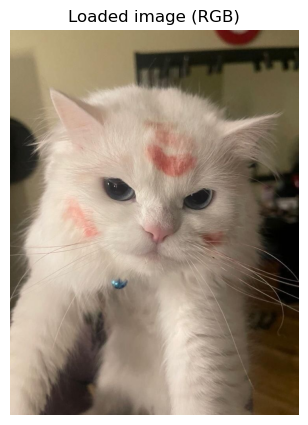

In [22]:
IMAGE_PATH = ('/Users/admin/Downloads/cat.jpeg')  # or "fruit basket.jpg"

img = load_image(IMAGE_PATH)
print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()


## 2) Image I/O basics

### Task 2.1 — Inspect pixels
1. Print the pixel value at `(row=0, col=0)` and at the image center.
2. Explain what the 3 numbers represent in an RGB image.

Write your answer under **Task 2.1 (Answer)**.

In [9]:
h, w = img.shape[:2]
print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h//2, w//2])


Top-left pixel: [192 175 132]
Center pixel: [197 167 157]


**Task 2.1 (Answer):**  
- The three numbers represent the Red, Green, and Blue (RGB) color channels. Each value typically ranges from 0 to 255, indicating the intensity of that specific color at the pixel location. For example, [255, 0, 0] represents pure red, while [0, 0, 0] represents black.
  

### Task 2.2 — Save and re-load
Save the loaded image to disk as `output_saved.png`, then load it again and verify:
- shape is the same
- dtype is `uint8`

Reloaded shape: (981, 736, 3) | dtype: uint8


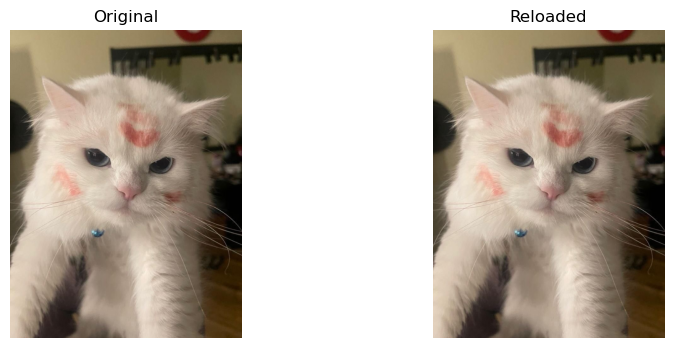

In [23]:

out_path = "/Users/admin/Downloads/cat.jpeg"

# OpenCV expects BGR when writing
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)
show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")


## 3) Grayscale and binary images

### Task 3.1 — Convert to grayscale
Create a grayscale version of the image using OpenCV. Display original vs grayscale.

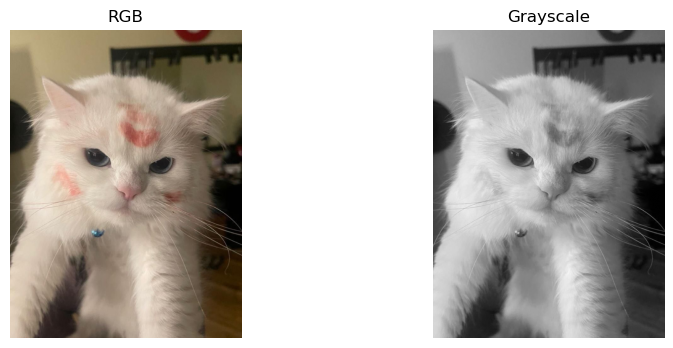

Gray shape: (981, 736) | dtype: uint8


In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")
print("Gray shape:", gray.shape, "| dtype:", gray.dtype)


### Task 3.2 — Threshold to binary
1. Create a binary image using a manual threshold (e.g., 128).
2. Create a binary image using Otsu's method.
3. Compare results (1–2 sentences).

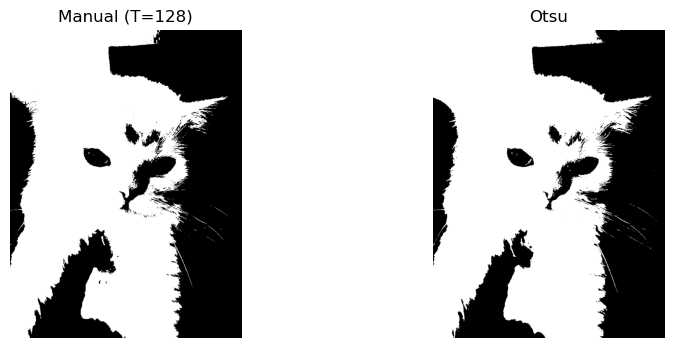

Otsu threshold chosen by OpenCV: 120.0


In [24]:
th_manual = 128
_, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)

_, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={th_manual})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", _)


**Task 3.2 (Answer):**  

 * Manual Thresholding: Uses a fixed global value (e.g., 128) regardless of the image's lighting conditions.
 * Otsu's Method: Automatically calculates the optimal threshold value by analyzing the image histogram to separate the foreground and background more effectively.
 * Comparison: Otsu's method generally provides a cleaner binary mask, especially if the lighting is not perfectly uniform.

## 4) Cropping (ROI)

### Task 4.1 — Crop a region of interest
1. Pick an ROI using array slicing: `img[y1:y2, x1:x2]`.
2. Display original and cropped ROI.

Tip: choose coordinates that capture a meaningful object/face.

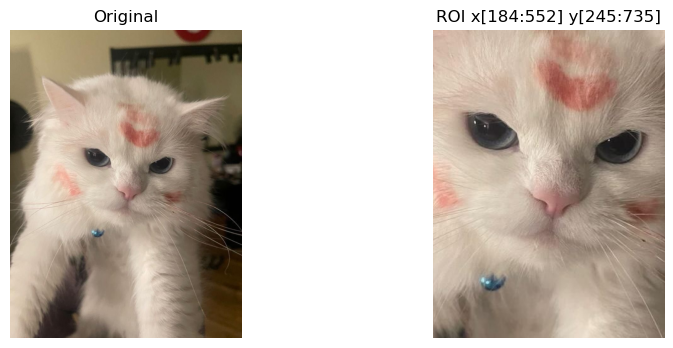

ROI shape: (490, 368, 3)


In [25]:
h, w = img.shape[:2]
x1, y1 = int(0.25*w), int(0.25*h)
x2, y2 = int(0.75*w), int(0.75*h)

roi = img[y1:y2, x1:x2].copy()
show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)


### Task 4.2 — Explain coordinates
Explain why the slicing is `img[y, x]` (row-major) and not `img[x, y]`.

**Task 4.2 (Answer):**  
 
 * Digital images are stored as matrices where the first index refers to the row and the second to the column. In a coordinate system, rows correspond to the vertical axis () and columns correspond to the horizontal axis (), which is why we use img[y, x].

## 5) Color spaces

### Task 5.1 — Convert RGB to HSV and visualize channels
1. Convert the image to HSV using OpenCV.
2. Display the H, S, and V channels as grayscale images.

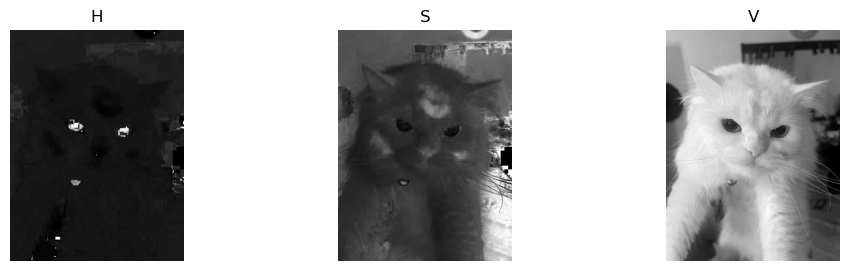

In [26]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.figure(figsize=(12,3))
for i, (ch, name) in enumerate([(H,"H"), (S,"S"), (V,"V")], start=1):
    plt.subplot(1,3,i); plt.imshow(ch, cmap="gray"); plt.title(name); plt.axis("off")
plt.show()


## 6) Lab 2 — Basic arithmetic operations on images

This section follows the Lab 2 handout (Basic arithmetic operations on images): subtraction, addition, multiplication, division.

Use your loaded image. Operations should be done safely on `uint8` images (0–255). OpenCV functions (`cv2.add`, `cv2.subtract`, etc.) saturate at 0/255 automatically.

### 6.1 Subtracting an intensity (darkening)


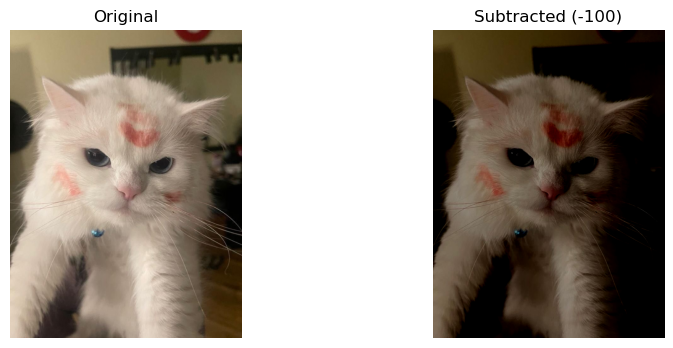

In [27]:
sub_val = 100  # TODO: try 30, 100, 150
img_sub = cv2.subtract(img, sub_val)

show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")


**Task 6.1 (Answer):**
1. What happens when you increase `sub_val`?  
2. Why does the image get darker?

 * Increasing sub_val makes the image darker because we are reducing the intensity values of the pixels toward 0 (black).

### 6.2 Subtract from *red channel only*
Modify only the **R** channel (in RGB) by subtracting a constant. Keep other channels unchanged.

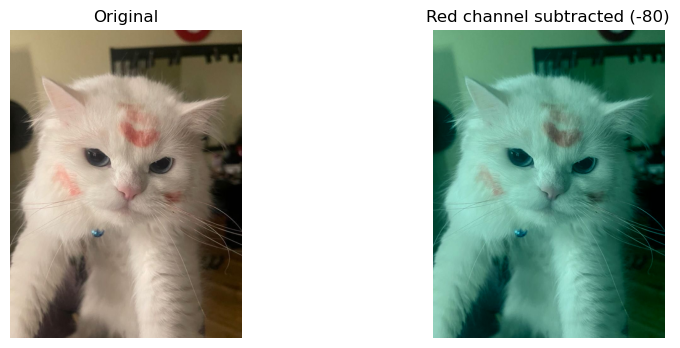

In [28]:
sub_val_r = 80

img_red_only = img.copy()
img_red_only[:,:,0] = cv2.subtract(img_red_only[:,:,0], sub_val_r)

show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")


### 6.3 Adding an intensity (brightening)

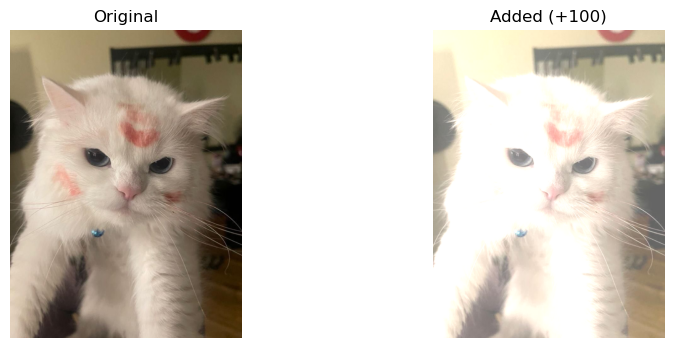

In [17]:
add_val = 100  # TODO: try 30, 100, 150
img_add = cv2.add(img, add_val)

show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")


**Task 6.3 (Answer):**
1. What happens when you increase `add_val`?  
2. Why does the image get brighter?  

 * Task 6.3 (Addition): Increasing add_val makes the image brighter because the pixel values shift toward 255 (white).



### 6.4 Add to *red channel only*

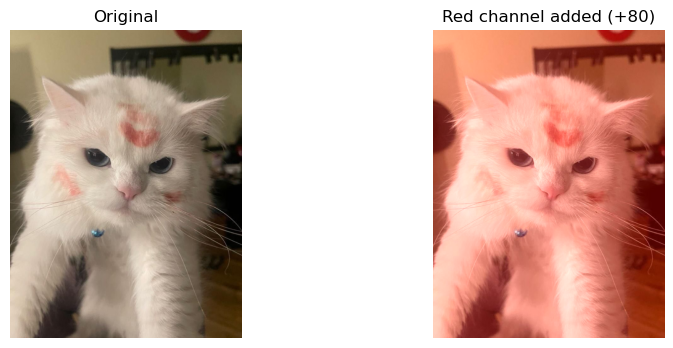

In [18]:
# TODO (Task 6.4): add to Red channel only
add_val_r = 80

img_red_only_add = img.copy()
img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)

show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")


### 6.5 Multiplying by a constant (contrast/brightness change)

Use `cv2.multiply` with a float factor. Convert to `float32` first, then clip back to `uint8`.

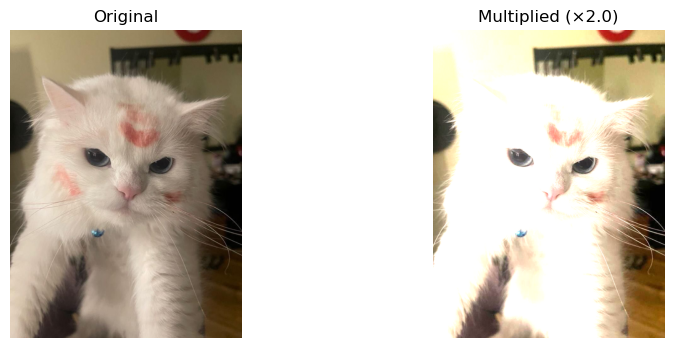

In [19]:
factor = 2.0

img_f = img.astype(np.float32)
img_mul = clip_uint8(img_f * factor)

show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")


**Task 6.5 (Answer):**
- Discuss the effect of multiplying by a factor > 1 vs < 1.  

 * Multiplying by a factor  increases both brightness and contrast, while a factor  scales down intensities, making the image darker and flatter.

### 6.6 Dividing by a constant

Division by a number > 1 tends to darken; division by < 1 tends to brighten (but can saturate).

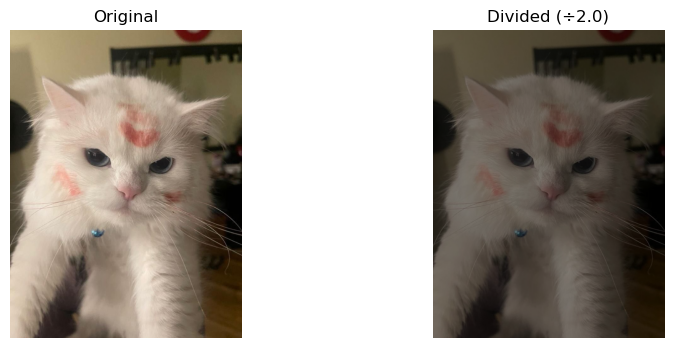

In [20]:
divisor = 2.0

img_f = img.astype(np.float32)
img_div = clip_uint8(img_f / divisor)

show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")


**Task 6.6 (Answer):**
- Compare dividing by a number greater than 1 versus less than 1.  

 * Dividing by a number  darkens the image by reducing intensity values. Dividing by a number  (like 0.5) effectively acts as multiplication and brightens the image.

## 7) Mini-report (required)

Write a short report (150–250 words) describing:
- what you learned
- which operation(s) were most useful and why
- any issues you encountered (file paths, color order, dtype, etc.)

**Report:**  
  
  In this assignment, I explored the fundamentals of Digital Image Processing using Python and OpenCV. I learned how to perform basic Image I/O operations, convert between different color spaces (RGB, Grayscale, and HSV), and apply thresholding techniques.
  The most useful operations were Otsu’s thresholding and arithmetic operations. Otsu's method is particularly powerful for automated image segmentation, while arithmetic operations like addition and multiplication are essential for adjusting image exposure and contrast.
  During the tasks, I encountered a few challenges, specifically regarding color channel ordering. Since OpenCV loads images in BGR format while Matplotlib displays them in RGB, I had to consistently use cv2.cvtColor to ensure colors looked natural. I also realized the importance of using cv2.add or np.clip when performing arithmetic to prevent uint8 overflow/underflow errors, which would otherwise create strange visual artifacts.



## Submission checklist
Include in your submission:
1. This completed notebook (`.ipynb`)
2. Screenshots/outputs of: original RGB, grayscale, binary, cropping ROI channels, and arithmetic operations
3. Your answers in the markdown answer blocks
